<a href="https://colab.research.google.com/github/safakan/CCTB_repo_safak_atakan_celik/blob/main/DEA113/Assignment4/Assignment4_EDA_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [244]:
import pandas as pd
import numpy as np

# to support visualizations with pandas
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

# #to ignore warnings, safak: why?
# import warnings
# warnings.filterwarnings('ignore')

## **Load Data**

In [245]:
url = "https://raw.githubusercontent.com/safakan/CCTB_repo_safak_atakan_celik/refs/heads/main/DEA113/Assignment4/used_cars_data.csv"

data = pd.read_csv(url)

data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## **Check Data**

This step is done parallel with the cleaning and the entire process. It's not possible to use some operations when data is not clean for example. Thus, please review this section as documentations from certain checks, but checks were not limited to these.

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [247]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [248]:
# Missing value percentages
(data.isnull().sum()/len(data))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [249]:
# Unique value counts
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [250]:
data.shape

(7253, 14)

**Field Meaning Assumptions:**


**Existing Issues:**
- missing values
- unit inconsistencies within same fields
- incorrect types for some numeric columns


**Questions:**
- any illogical value?
- are there any duplicate listings?
- any outlier/anomalies?
- any other format issues?
- are the mentioned units accurate? what will be the unit assumption for the price? Lakh?

**Fields So Far So Good**
- Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Location

**Cleaning Cases**
1. Data reduction
 - Drop the column "S.No." | It doesn't have significance to this analysis, and it's the same as the index
 - Drop the column "New Price" | It's mostly null, only partially relevant; a separate analysis can be done comparing only existing prices with new prices.

2. Fixing erroneous data
- Move units from cells/values to the field names.
  - do it for columns: Mileage, Engine, New_Price, Power
    - use common unit measures, double check different unit values against assumptions


3. Missing values
 - Mileage, Engine, Seats, Power, New_Price, Price

4. Type check
- double check Mileage, Engine, New_Price and cast them to numeric
- type of Seats can be integer


**Feature Engineering**
- Brand from the Name - requires cleaning
- Car Age


---




## **Clean Data**

**S.No.**

In [251]:
# 1.1 Dropping "S.No." bcs it's same as ID, not adding value, it would be good to use for cleaning purposes if it was a unique product/car id.
data.drop(columns=["S.No."], inplace=True)

**Name**

In [252]:
# Retrieve brand names
data["Brand"] = data.Name.str.split().str.get(0)
# Store the rest as model details, the information here can be used further.
data["Variant_Details"] = data.Name.str.split().str[1:].str.join(" ")
# Drop Name column, the new 2 columns add more value now.
data.drop(columns=["Name"], inplace=True)

data[["Brand","Variant_Details"]]

,Brand,Variant_Details
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic
...,...,...
7248,Volkswagen,Vento Diesel Trendline
7249,Volkswagen,Polo GT TSI
7250,Nissan,Micra Diesel XV
7251,Volkswagen,Polo GT TSI


In [253]:
## print(data.Brand.unique())
## print(data.Brand.nunique())
# ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
#  'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
#  'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
#  'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
#  'Lamborghini' 'Hindustan' 'OpelCorsa']


# Land → Land Rover
# OpelCorsa → Opel | Opel is the brand, and Corsa is a model. but this will be dropped due to null price.
# Hindustan → Likely refers to Hindustan Motors, known for the Ambassador car.
# Ambassador → A model from Hindustan Motors.
# ISUZU and Isuzu → Duplicate entry (same brand).


data.loc[data["Brand"] == "Ambassador", "Variant_Details"] = "Ambassador " + data.loc[data["Brand"] == "Ambassador", "Variant_Details"]
# 'Isuzu' ,'ISUZU','Mini','Land', 'OpelCorsa', 'Hindustan', 'Ambassador',
# searchfor = ['OpelCorsa', 'Hindustan', 'Ambassador']
# data[data.Brand.str.contains('|'.join(searchfor))]

## DEPRECATED FUNCTION!!!!!!!!!!!!!!!!!!!!!!!!! CHANGE THIS!!!!!!!!!!!!!!!!!!!
data["Brand"].replace({"ISUZU": "Isuzu", "Land":"Land Rover", "Ambassador": "Hindustan Motors", "Hindustan": "Hindustan Motors"}, inplace=True)

<ipython-input-253-fa4a3fff44b5>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Brand"].replace({"ISUZU": "Isuzu", "Land":"Land Rover", "Ambassador": "Hindustan Motors", "Hindustan": "Hindustan Motors"}, inplace=True)


**Power**

In [131]:
## Making sure to not remove something without noticing it.
# field_power = data[data["Power"].notnull()]["Power"].str.split(' ').tolist()
# mp = {}
# mp["measures"] = []
# for i in field_power:
#   mp[len(i)] = None # print(len(mp)) # 2
#   mp["measures"].append(i[1]) # print(set(mp["measures"]))  # {'bhp'}
## all bhp, good.


## Split the measures from values
data["Power"] = data["Power"].str.split(' ').str[0]
data.rename(columns={"Power": "Power_bph"}, inplace=True) # to keep a record of the unit used


## CASTING TO NUMERIC
#  pd.to_numeric(data["Power_bph"]) # ValueError: Unable to parse string "null"
# data[data["Power_bph"] == "null"] # 129 records.
data["Power_bph"] = data["Power_bph"].replace("null", pd.NA) # replacing string representations with actual null
# data[data["Power"] == "null"] # 0 records now.
data["Power_bph"] = pd.to_numeric(data["Power_bph"])


# Fill missing values

**Engine**

In [121]:
# ## Making sure to not remove something without noticing it.
# field_engine = data[data["Engine"].notnull()]["Engine"].str.split(' ').tolist()
# mp = {}
# mp["measures"] = []
# for i in field_engine:
#   mp[len(i)] = None # print(len(mp)) # 2
#   mp["measures"].append(i[1]) # print(set(mp["measures"]))  # {'CC'}
# # all CC, good.

## SEPARATE MEASURES FROM VALUES
data["Engine"] = data["Engine"].str.split(" ").str[0]
data.rename(columns={"Engine": "Engine_CC"}, inplace=True) # to keep the unit of measure

# CASTING TO NUMERIC
data["Engine_CC"] = pd.to_numeric(data["Engine_CC"])

# FILL MISSING VALUES

**Investigating Prices**

In [ ]:
# Drop rows where price is empty. this is used car dataset, that price is a key point.
# It's risky to fill it I think. It's independent from other fields.
# 17% ratio of missing is not small, but still we'll have a lot of data, and it should be reliable.


In [ ]:
# Making sure to not remove something without noticing it, and not to assume currencies.
new_price_list = data[data["New_Price"].notnull()]["New_Price"].str.split(' ').tolist()

mp = {}
mp["currencies"] = []
for i in new_price_list:
  mp[len(i)] = None
  mp["currencies"].append(i[1])
print(len(mp)) # 2
print(set(mp["currencies"])) # {'Cr', 'Lakh'}

2
{'Cr', 'Lakh'}


In [ ]:
# Filter where new price is not null and move the currencies here to a separate field.
data[["Price_New", "Currency"]] = data[data["New_Price"].notnull()]["New_Price"].str.split(' ', expand=True)
# Drop the old New_Price column
data.drop(columns=["New_Price"], inplace=True)

# type casts to allow operations
data["Price_New"] = data["Price_New"].astype(float)
data["Price"] = data["Price"].astype(float)

# Update Price_New values where the currency is Crore and use Lakh the common currency.
data["Price_New"] = data.apply(lambda row: row["Price_New"] * 100 if row["Currency"] == "Cr" else row["Price_New"], axis=1)

#
data["PriceDiff"] = data["Price_New"] - data["Price"]



**New Feature: Car Age**

In [134]:
data['Car_Age']=date.today().year-data['Year']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power_bph,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5.0,NaN,17.74,12


**Visuals**

<Axes: >

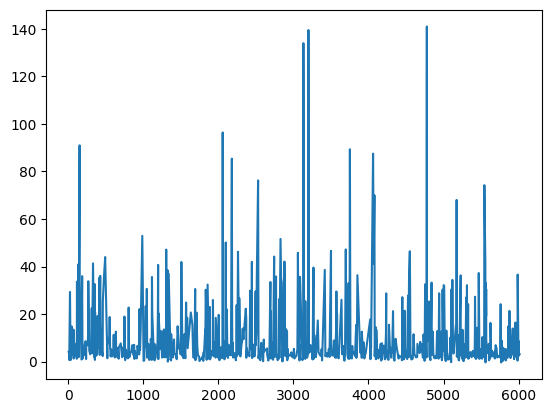

In [ ]:
priceData = data[data["PriceDiff"].notnull()]["PriceDiff"]
priceData.plot(kind='line')

In [ ]:
# order descending: data[data["PriceDiff"].notnull()]["PriceDiff"]
data[data["PriceDiff"].notnull()].sort_values(by="PriceDiff", ascending=False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_New,Currency,PriceDiff
4778,Mercedes-Benz S-Class S 350 d,Bangalore,2011,47140,Diesel,Automatic,Second,13.5 kmpl,2925 CC,281.61 bhp,5.0,30.00,171.00,Cr,141.00
3199,BMW 7 Series 730Ld Design Pure Excellence CBU,Kolkata,2012,41100,Diesel,Automatic,First,16.77 kmpl,2993 CC,261.49 bhp,5.0,26.50,166.00,Cr,139.50
3132,Porsche Cayenne Base,Kochi,2019,14298,Petrol,Automatic,First,13.33 kmpl,2995 CC,340 bhp,5.0,2.02,136.00,Cr,133.98
2056,BMW 7 Series 730Ld Eminence,Kochi,2015,29966,Diesel,Automatic,Second,16.77 kmpl,2993 CC,261.49 bhp,5.0,43.60,140.00,Cr,96.40
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05 kmpl,2894 CC,444 bhp,4.0,37.00,128.00,Cr,91.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,Renault KWID 1.0 RXT Optional,Kochi,2018,18335,Petrol,Manual,First,21.7 kmpl,999 CC,67 bhp,5.0,4.50,4.61,Lakh,0.11
1324,Maruti Ignis 1.2 Delta,Coimbatore,2019,16862,Petrol,Manual,First,20.89 kmpl,1197 CC,81.80 bhp,5.0,6.06,6.07,Lakh,0.01
5102,Maruti Wagon R VXI,Kochi,2019,31817,Petrol,Manual,First,22.5 kmpl,998 CC,67.04 bhp,5.0,5.34,5.12,Lakh,-0.22
5560,Renault KWID RXT Optional,Kochi,2019,6568,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,5.09,4.78,Lakh,-0.31


- We have different currencies used.
- 86% of new prices, 17% of prices is missing.
- New prices is quite problematic. 86% of it is missing, and keeping it will distort the results. I will drop it.

The dataset in general is a bit problematic

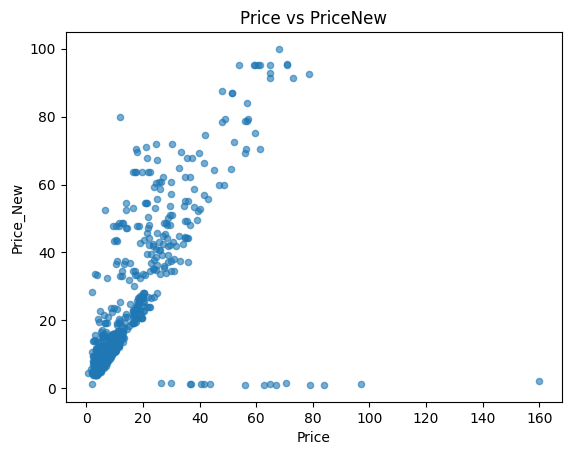

In [ ]:
# this is not meaningful
priceData.plot(kind='scatter', x='Price', y='Price_New', alpha=0.6)
plt.title('Price vs PriceNew')
plt.show()

---

### ANYTHING BELOW IS AN EARLIER DRAFT

---

**start--playground-cell**

In [ ]:
data[data["Mileage"].isnull()]
# two records here
## A.Name: Mahindra E Verito D4
## B.Name: Toyota Prius 2009-2016 Z4
## A, B: Milege NaN
### B: New_Price NaN

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


**end--playground-cell**

In [ ]:
data["Name"].dropna().apply(lambda x: x.split(" ")[0]).unique()
# mini -> mini cooper
# land -> land rover
# isuzus unite into > Isuzu

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
# something like this: data["Name"] column values that starts with "Maruti"
data[data["Name"].str.startswith("Opel")]["Name"]

,Name
7067,OpelCorsa 1.4Gsi


## Save For Later

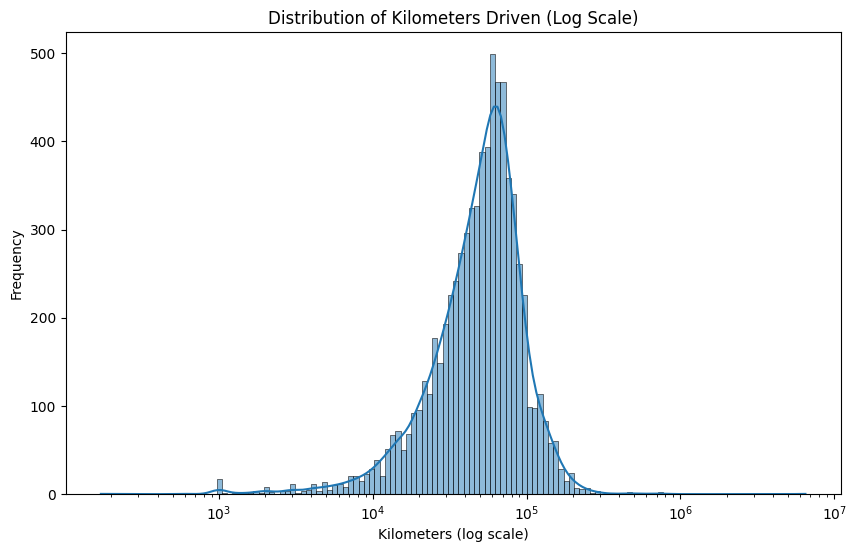

In [ ]:
# Kilometers Driven
plt.figure(figsize=(10, 6))
sns.histplot(data=data['Kilometers_Driven'], kde=True, log_scale=True)
plt.title('Distribution of Kilometers Driven (Log Scale)')
plt.xlabel('Kilometers (log scale)')
plt.ylabel('Frequency')
plt.show()

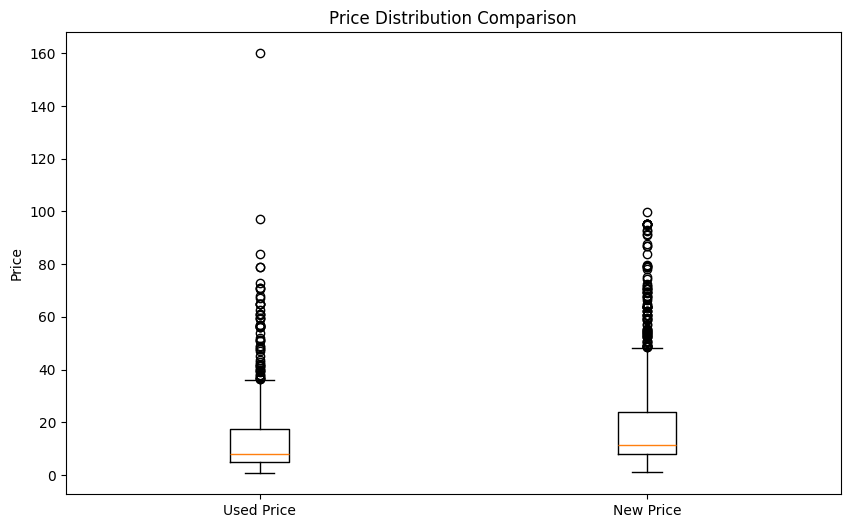

In [ ]:
# Compare Used & New Prices
new_prices = data["New_Price"].dropna().apply(lambda x: x.split(" ")[0]).astype(float)
prices = data[data["New_Price"].notnull()]["Price"].dropna()

# only keep records where both new prices and prices have values
new_prices = new_prices[new_prices.index.isin(prices.index)]
prices = prices[prices.index.isin(new_prices.index)]


# box plot
plt.figure(figsize=(10, 6))
plt.boxplot([prices, new_prices], tick_labels=['Used Price', 'New Price'])
plt.title('Price Distribution Comparison')
plt.ylabel('Price')
plt.show()

In [ ]:
# consider this analysis
def find_similar_listings(df):
    # Group by Name and analyze each group
    similar_listings = []

    for name in df[df['Name'].duplicated(keep=False)]['Name'].unique():
        group = df[df['Name'] == name]

        # If same location and price difference within 5%
        if len(group) > 1:
            for i in range(len(group)):
                for j in range(i+1, len(group)):
                    row1 = group.iloc[i]
                    row2 = group.iloc[j]

                    # Check if location is same
                    same_location = row1['Location'] == row2['Location']

                    # Check if price difference is within 5%
                    if row1['Price'] and row2['Price']:  # Ensure prices exist
                        price_diff_pct = abs(row1['Price'] - row2['Price']) / row1['Price'] * 100
                        similar_price = price_diff_pct <= 5

                        if same_location and similar_price:
                            similar_listings.append((row1.name, row2.name))

    return similar_listings

# similar_listings = find_similar_listings(data)
# print(similar_listings)